# 3. Converting Text to Features

we are going to cover basic to advanced feature
engineering (text to features) methods

- One Hot encoding
- Count vectorizer
- N-grams
- Co-occurrence matrix
- Hash vectorizer
- Term Frequency-Inverse Document
- Frequency (TF-IDF)
- Word embedding
- Implementing fastText

The procedure of converting raw text data into machine
understandable format (numbers) is called feature engineering of text
data. Machine learning and deep learning algorithms’ performance and
accuracy is fundamentally dependent on the type of feature engineering
technique used.
In this chapter, we will discuss different types of feature engineering
methods along with some state-of-the-art techniques; their functionalities,
advantages, disadvantages; and examples for each. All of these will make
you realize the importance of feature engineering.

## 1. Converting Text to Features Using One Hot Encoding

In [ ]:
Text = "I am learning NLP I"

In [ ]:
# Importing the library
import pandas as pd
# Generating the features
pd.get_dummies(Text.split())

## 2. Converting Text to Features Using Count Vectorizing

Above approach has a disadvantage. It does not take the
frequency of the word occurring into consideration. If a particular word
is appearing multiple times, there is a chance of missing the information
if it is not included in the analysis. A count vectorizer will solve that
problem.

Count vectorizer is almost similar to One Hot encoding. The only
difference is instead of checking whether the particular word is present or
not, it will count the words that are present in the document.


In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer
# Text
text = ["I love NLP and I will learn NLP in 2month "]
# create the transform
vectorizer = CountVectorizer()
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

## 3.Generating N-grams

- Unigrams are the unique words present in the sentence.
- Bigram is the combination of 2 words.
- Trigram is 3 words and so on.

### 3-1 Generating N-grams using TextBlob

In [ ]:
Text = "I am learning NLP"

In [ ]:
#Import textblob
from textblob import TextBlob
#For unigram : Use n = 1
TextBlob(Text).ngrams(1)

In [ ]:
TextBlob(Text).ngrams(3)

### 3-2 Bigram-based features for a document

In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer
# Text
text = ["I love NLP and I will learn NLP in 2month "]
# create the transform
vectorizer = CountVectorizer(ngram_range=(2,2))
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

## 5. Hash Vectorizing

HashingVectorizer is an alternative method for converting text data into numerical feature vectors. It is a part of the scikit-learn library in Python and is particularly useful when dealing with large text datasets. Unlike CountVectorizer or TfidfVectorizer, which create fixed-size vectors for each unique term, HashingVectorizer applies a hashing trick to map terms directly to indices in a fixed-size hash table.

The hashing trick involves applying a hash function to the terms, which then determines the index in the feature vector where the term's count will be stored. This hash function can be a simple modulo operation or a more sophisticated hash function.

Here's an overview of how HashingVectorizer works:

- The input text data is tokenized into terms (words) just like in other vectorizers.
- The hashing function maps each term to an index in the feature vector.
- The count of each term is stored in the corresponding index of the feature vector.
- The main advantage of HashingVectorizer is that it requires less memory compared to CountVectorizer or - ----- TfidfVectorizer, especially when the number of terms (features) is very large. However, there are a few downsides to using HashingVectorizer:

It lacks the ability to convert feature indices back to the original terms because it does not keep a vocabulary like CountVectorizer or TfidfVectorizer.
Due to the hashing collisions, different terms may be mapped to the same index, leading to some loss of information.

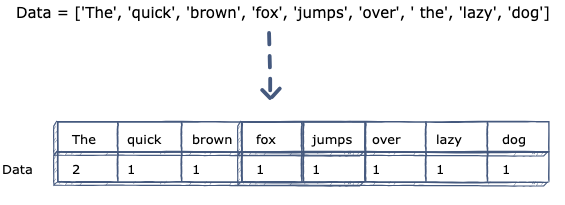

### 5-1 Import the necessary libraries and create document

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

### 5-2 Generate hash vectorizer matrix

In [ ]:
# transform
vectorizer = HashingVectorizer(n_features=10)
# create the hashing vector
vector = vectorizer.transform(text)
# summarize the vector
print(vector.shape)
print(vector.toarray())

## 6. Converting Text to Features Using TF-IDF

Again, in the above-mentioned text-to-feature methods, there are few
drawbacks, hence the introduction of TF-IDF. Below are the disadvantages
of the above methods.
- Let’s say a particular word is appearing in all the documents
of the corpus, then it will achieve higher importance in
our previous methods. That’s bad for our analysis.
- The whole idea of having TF-IDF is to reflect on how
important a word is to a document in a collection, and
hence normalizing words appeared frequently in all the
documents

**Term frequency (TF)** : Term frequency is simply the ratio of the count of a
word present in a sentence, to the length of the sentence.
TF is basically capturing the importance of the word irrespective of the
length of the document. For example, a word with the frequency of 3 with
the length of sentence being 10 is not the same as when the word length of
sentence is 100 words. It should get more importance in the first scenario;
that is what TF does.<br>


**Inverse Document Frequency (IDF)**: IDF of each word is the log of
the ratio of the total number of rows to the number of rows in a particular
document in which that word is present.
IDF = log(N/n), where N is the total number of rows and n is the
number of rows in which the word was present.
IDF will measure the rareness of a term. Words like “a,” and “the” show
up in all the documents of the corpus, but rare words will not be there
in all the documents. So, if a word is appearing in almost all documents,
then that word is of no use to us since it is not helping to classify or in
information retrieval. IDF will nullify this problem.
TF-IDF is the simple product of TF and IDF so that both of the
drawbacks are addressed, which makes predictions and information
retrieval relevant.

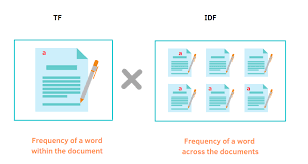

In [ ]:
Text = ["The quick brown fox jumped over the lazy dog.","The dog.","The fox"]

In [ ]:
#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Create the transform
vectorizer = TfidfVectorizer()
#Tokenize and build vocab
vectorizer.fit(Text)
#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

If you observe, “the” is appearing in all the 3 documents and it does
not add much value, and hence the vector value is 1, which is less than all
the other vector representations of the tokens.
All these methods or techniques we have looked into so far are based
on frequency and hence called frequency-based embeddings or features.

## 7. Implementing WordEmbeddings

Even though all previous methods solve most of the problems, once
we get into more complicated problems where we want to capture the
semantic relation between the words, these methods fail to perform.
Below are the challenges:
- All these techniques fail to capture the context and meaning of the words. All the methods discussed so far basically depend on the appearance or frequency of the words. But we need to look at how to capture thecontext or semantic relations: that is, how frequently the words are appearing close by.

1. I am eating an ***apple***.
2. I am using ***apple***.

If you observe the above example, Apple gives different meanings when it is used with different (close by) adjacent words, eating and using

- For a problem like a document classification (bookclassification in the library), a document is reallyhuge and there are a humongous number of tokensgenerated. In these scenarios, your number of feature scan get out of control (wherein) thus hampering the accuracy and performance

A machine/algorithm can match two documents/texts and say
whether they are same or not. But how do we make machines tell you
about cricket or Virat Kohli when you search for MS Dhoni? How do you
make a machine understand that “Apple” in “Apple is a tasty fruit” is a fruit
that can be eaten and not a company?
The answer to the above questions lies in creating a representation
for words that capture their meanings, semantic relationships, and the
different types of contexts they are used in.

The above challenges are addressed by Word Embeddings.
Word embedding is the feature learning technique where words from
the vocabulary are mapped to vectors of real numbers capturing the
contextual hierarchy. <br>

If you observe the below table, every word is represented with 4
numbers called vectors. Using the word embeddings technique, we are
going to derive those vectors for each and every word so that we can use it
in future analysis. In the below example, the dimension is 4. But we usually
use a dimension greater than 100.

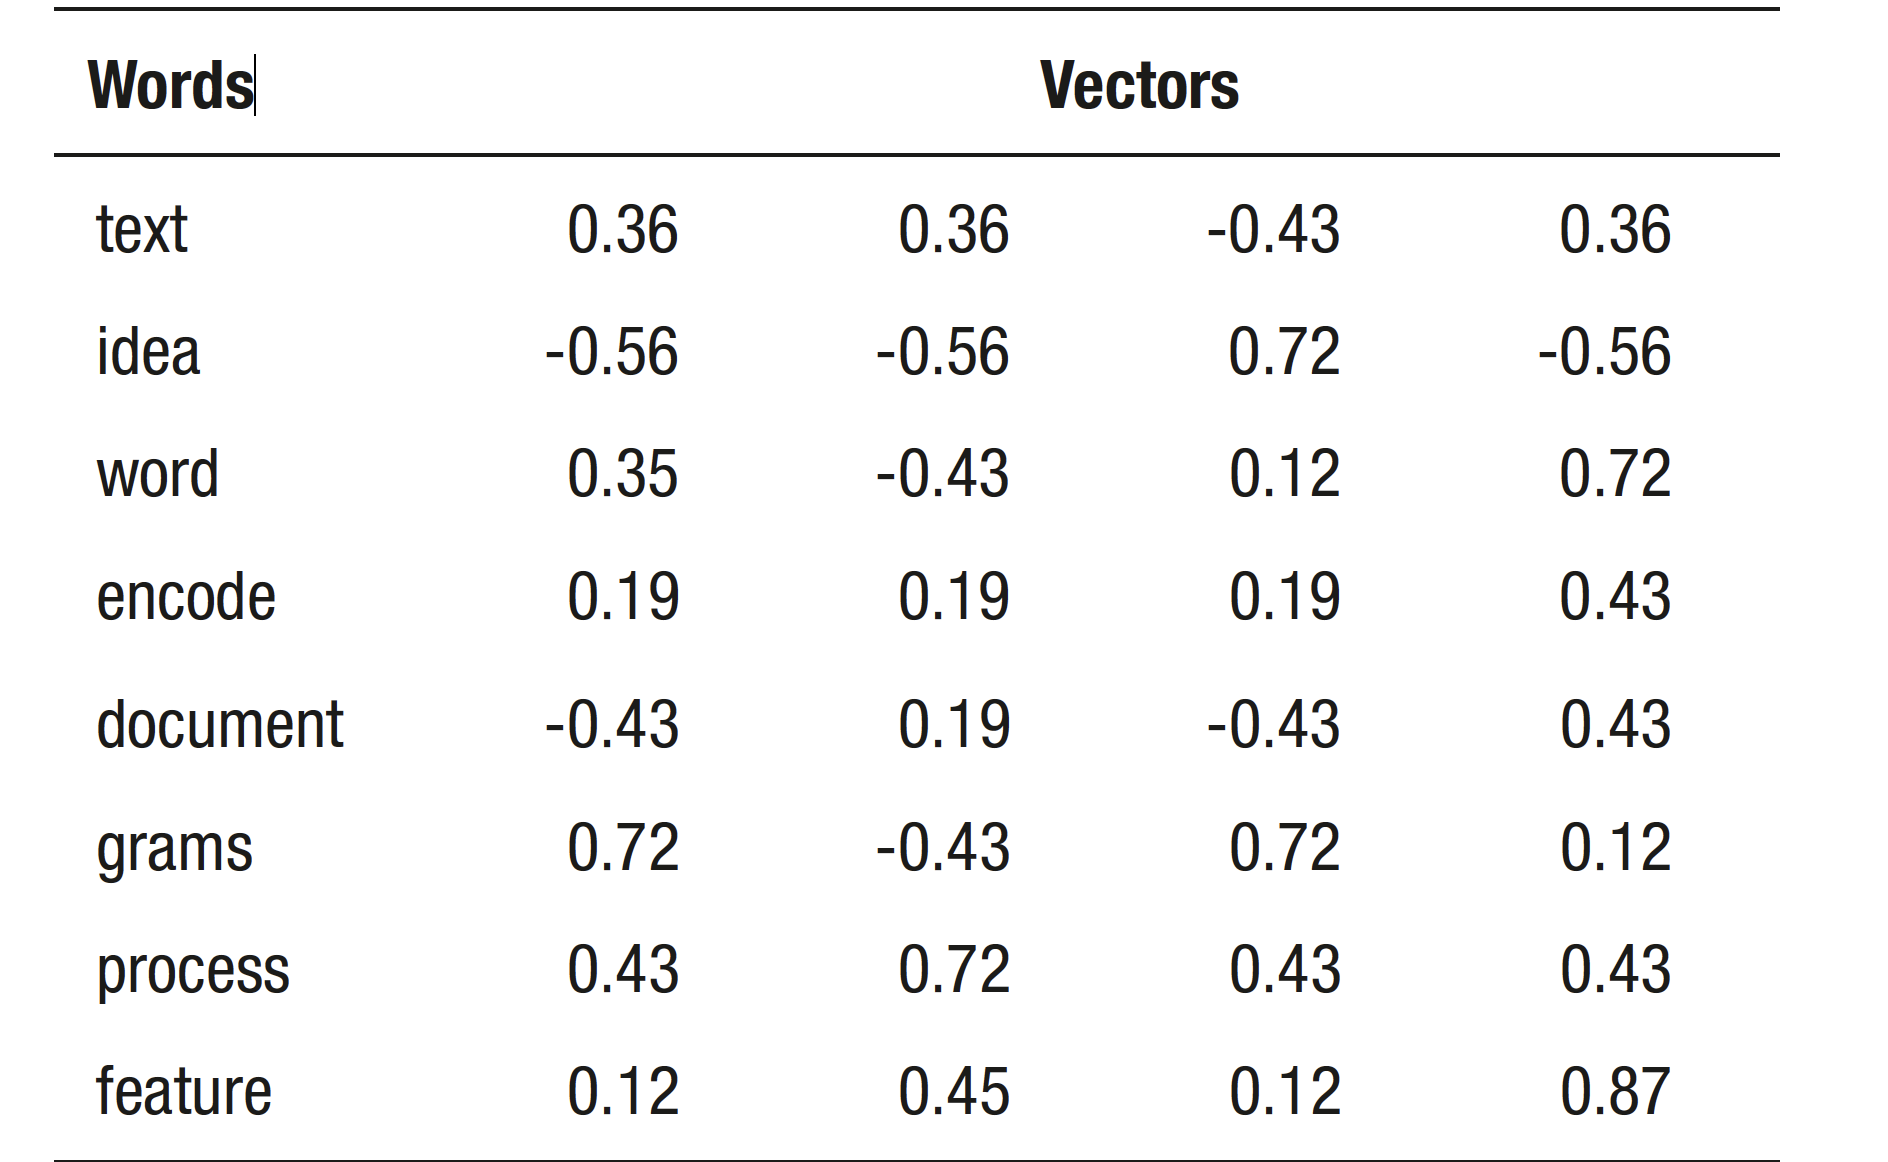

Word embeddings are prediction based, and they use shallow neural
networks to train the model that will lead to learning the weight and using
them as a vector representation.<br>

**Word2vec**: word2vec is the deep learning Google framework to train
word embeddings. It will use all the words of the whole corpus and predict
the nearby words. It will create a vector for all the words present in the
corpus in a way so that the context is captured. It also outperforms any
other methodologies in the space of word similarity and word analogies.
There are mainly 2 types in word2vec.
- Skip-Gram
- Continuous Bag of Words (CBOW)

 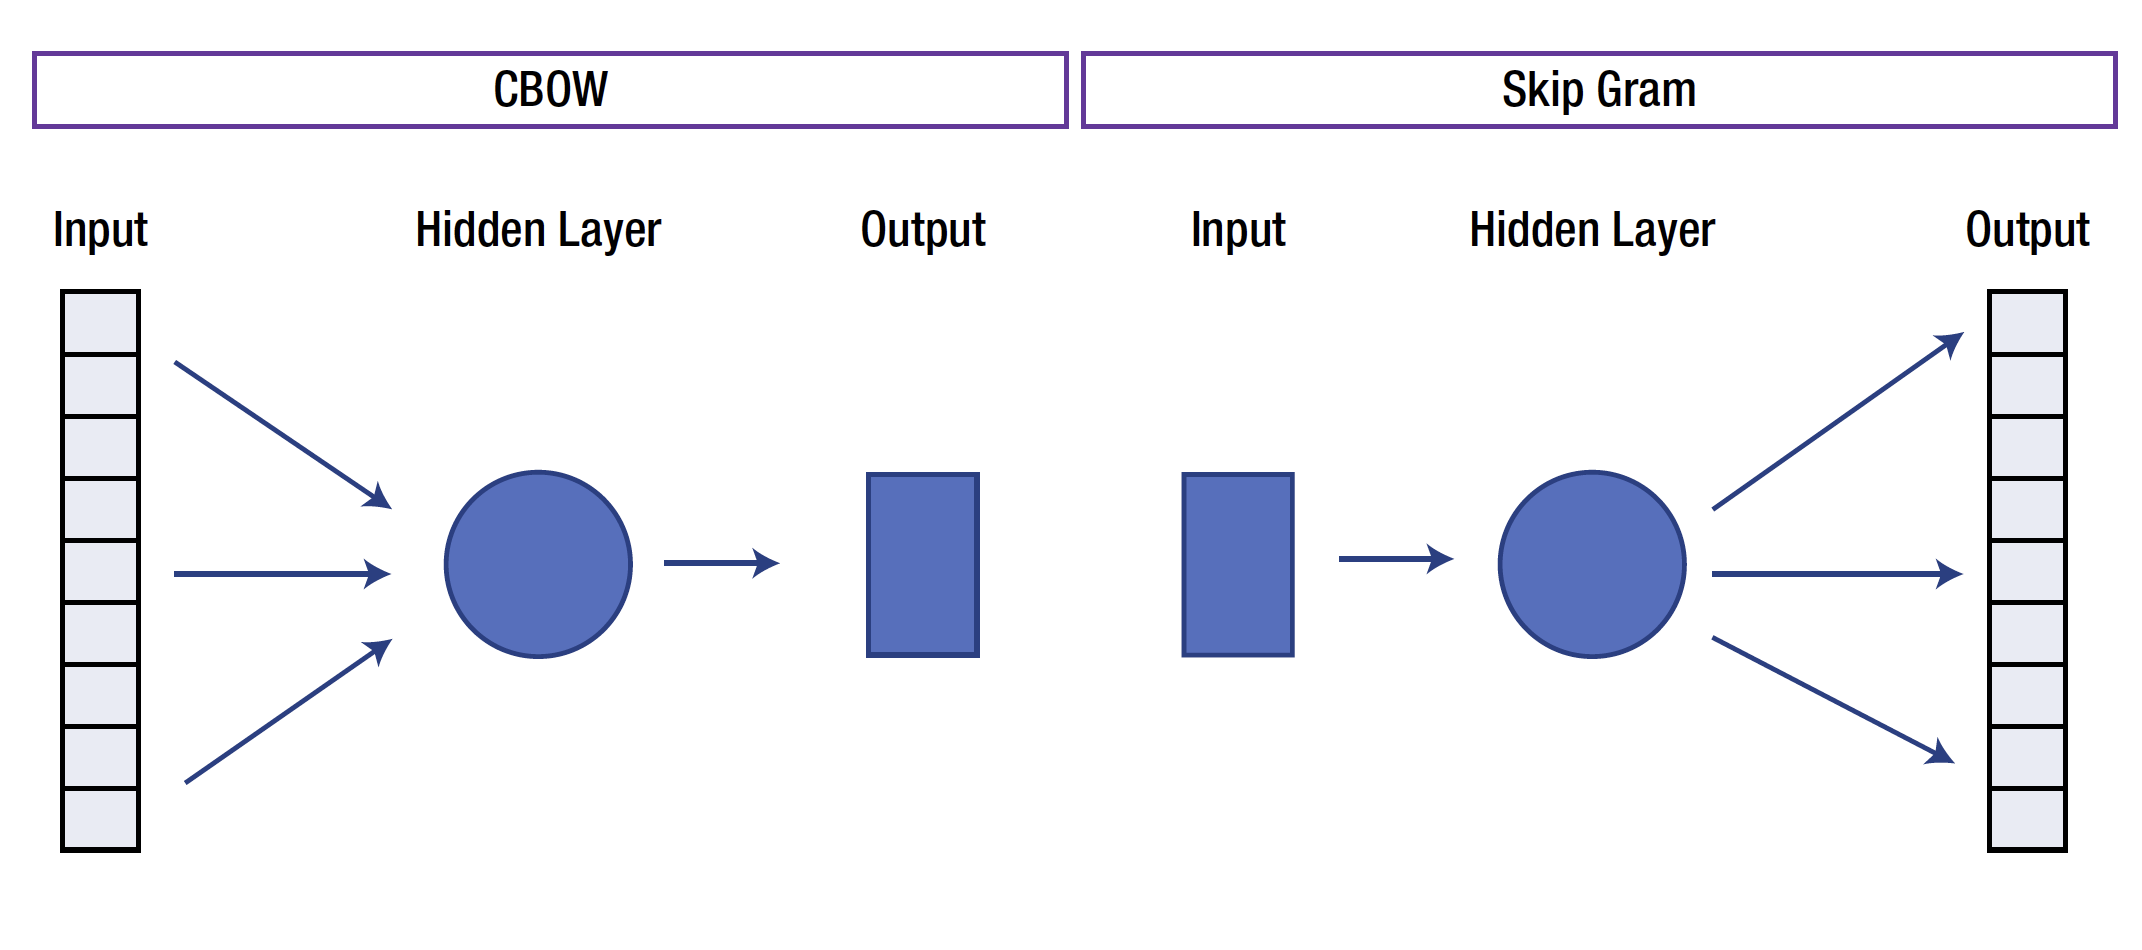

The above figure shows the architecture of the CBOW and skip-gram
algorithms used to build word embeddings. Let us see how these models
work in detail.

The skip-gram model (Mikolov et al., 2013)1 is used to predict the
probabilities of a word given the context of word or words.<br>

Let us take a small sentence and understand how it actually works.
Each sentence will generate a target word and context, which are the words
nearby. The number of words to be considered around the target variable
is called the window size. The table below shows all the possible target
and context variables for window size 2. Window size needs to be selected
based on data and the resources at your disposal. The larger the window
size, the higher the computing power.

In [ ]:
Text = 'I love NLP and I will learn NLP in 2 months'

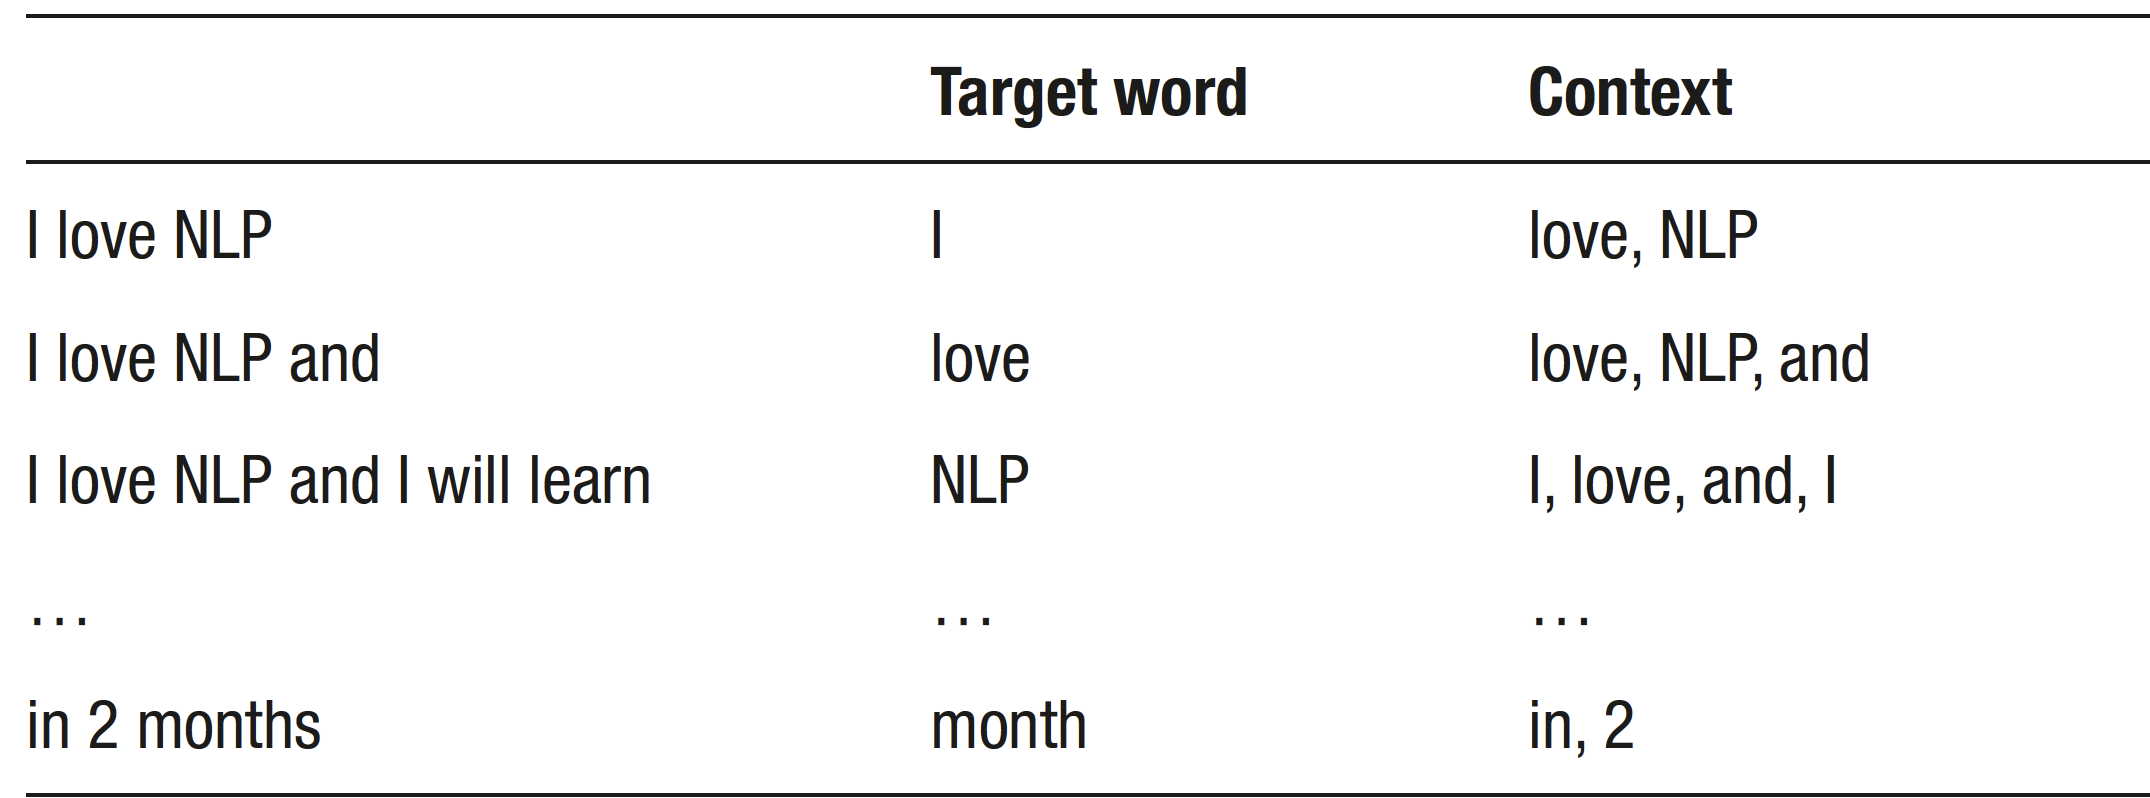

Since it takes a lot of text and computing power, let us go ahead and
take sample data and build a skip-gram model.

In [28]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves','lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

In [29]:
#import library
! pip install gensim==3.8.3
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [30]:
# training the model
skipgram = Word2Vec(sentences, size =50, window = 3, min_count=1,sg = 1)
print(skipgram)

Word2Vec(vocab=21, size=50, alpha=0.025)


In [31]:
skipgram['nlp']

<ipython-input-31-14838e40202c>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  skipgram['nlp']


array([ 0.00968476,  0.00642207, -0.00955475,  0.00038943,  0.00775118,
        0.0033084 ,  0.00388154, -0.0020541 , -0.00640303, -0.00579133,
        0.0076336 ,  0.00599403,  0.0015965 , -0.00827379, -0.00781073,
        0.00983053, -0.00125015, -0.00518447, -0.00255745,  0.00671087,
       -0.00380224, -0.00462735,  0.00661523,  0.0052833 ,  0.00050418,
       -0.00456322, -0.0087545 ,  0.00838503, -0.00352382, -0.00590691,
        0.00970848,  0.00719592, -0.00718204,  0.00031569,  0.00256901,
       -0.00545637, -0.00128805,  0.00368701, -0.0073409 , -0.00519481,
       -0.00644587,  0.00291458, -0.00858021,  0.00986713,  0.00012186,
       -0.00294761,  0.00280378, -0.00310625, -0.00289201, -0.00121241],
      dtype=float32)

In [32]:
skipgram['lwm']

<ipython-input-32-29dadbe16d5f>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  skipgram['lwm']


KeyError: "word 'lwm' not in vocabulary"

We get an error saying the word doesn’t exist because this word was
not there in our input training data. This is the reason we need to train the
algorithm on as much data possible so that we do not miss out on words.

In [33]:
# save model
skipgram.save('skipgram.bin')

In [ ]:
# load model
skipgram = Word2Vec.load('skipgram.bin')

T – SNE plot is one of the ways to evaluate word embeddings. Let’s
generate it and see how it looks.

In [34]:
# T – SNE plot
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


<ipython-input-34-c9298afdf2ee>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = skipgram[skipgram.wv.vocab]


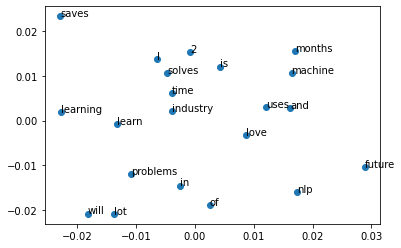

In [35]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

**Continuous Bag of Words(CBOW)**

In [36]:
#import library
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [37]:
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]


Word2Vec(vocab=21, size=50, alpha=0.025)
[ 0.00968476  0.00642207 -0.00955475  0.00038943  0.00775118  0.0033084
  0.00388154 -0.0020541  -0.00640303 -0.00579133  0.0076336   0.00599403
  0.0015965  -0.00827379 -0.00781073  0.00983053 -0.00125015 -0.00518447
 -0.00255745  0.00671087 -0.00380224 -0.00462735  0.00661523  0.0052833
  0.00050418 -0.00456322 -0.0087545   0.00838503 -0.00352382 -0.00590691
  0.00970848  0.00719592 -0.00718204  0.00031569  0.00256901 -0.00545637
 -0.00128805  0.00368701 -0.0073409  -0.00519481 -0.00644587  0.00291458
 -0.00858021  0.00986713  0.00012186 -0.00294761  0.00280378 -0.00310625
 -0.00289201 -0.00121241]


<ipython-input-38-80b7b737e6b7>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(cbow['nlp'])
<ipython-input-38-80b7b737e6b7>:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = cbow[cbow.wv.vocab]


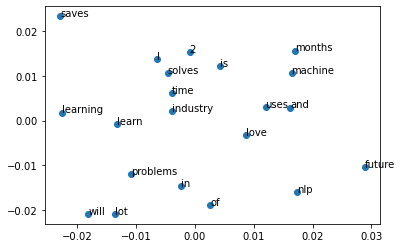

In [38]:
# training the model
cbow = Word2Vec(sentences, size =50, window = 3, min_count=1,sg = 0)
print(cbow)
# access vector for one word
print(cbow['nlp'])
# save model
cbow.save('cbow.bin')
# load model
cbow = Word2Vec.load('cbow.bin')
# T – SNE plot
X = cbow[cbow.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

But to train these models, it requires a huge amount of computing
power. So, let us go ahead and use Google’s pre-trained model, which has
been trained with over 100 billion words.
Download the model from the below path and keep it in your local
storage:

https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [39]:
# import gensim package
import gensim
# load the saved model
model = gensim.models.KeyedVectors.load_word2vec_format('/Users/jothiramsanjeevi/Documents/IPythonnotebook/Natural Language Processing Bootcamp/GoogleNews-vectors-negative300.bin', binary=True)


In [40]:
print (model.similarity('this', 'is'))

0.40797037


In [43]:
print (model.similarity('note', 'book'))

0.22819659


“This” and “is” have a good amount of similarity, but the similarity
between the words “post” and “book” is poor. For any given set of words,
it uses the vectors of both the words and calculates the similarity between
them.

In [44]:
# Finding the odd one out.
model.doesnt_match('breakfast cereal dinner lunch'.split())

/Users/jothiramsanjeevi/opt/anaconda3/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

Of 'breakfast’, ‘cereal’, ‘dinner’ and ‘lunch', only cereal is the word that is
not anywhere related to the remaining 3 words.

In [45]:
# It is also finding the relations between words.
model.most_similar(positive=['woman', 'king'],negative=['man'])

[('queen', 0.7118192315101624),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235946178436279),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

## 8. Implementing FastText 

FastText is the improvised version of word2vec. word2vec basically
considers words to build the representation. But fastText takes each
character while computing the representation of the word.

In [46]:
# Import FastText
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [47]:
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

In [48]:
fast = FastText(sentences,size=20, window=1, min_count=1,workers=5, min_n=1, max_n=2)

In [49]:
print(fast['nlp'])

[ 0.00145743 -0.006103   -0.01052622 -0.00311103 -0.00338806  0.02404632
 -0.00938473  0.00470077 -0.00037666 -0.00319065 -0.01831873 -0.00377998
 -0.00250528 -0.0063827   0.00522308  0.01522697  0.02165839 -0.00143036
 -0.00438009  0.00490688]


<ipython-input-49-9660a93a0b3c>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(fast['nlp'])


In [51]:
# vector for word deep
print(fast['lwm'])

[ 0.01264469  0.01054738  0.00573748 -0.0077113  -0.00987608  0.01189314
 -0.01797646 -0.014507    0.0055169   0.01226431 -0.01135649  0.00226093
  0.00192441 -0.01197585  0.00414843  0.00763462  0.00511211 -0.00480493
 -0.0043264  -0.00234477]


<ipython-input-51-488f5f62312b>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(fast['lwm'])


This is the advantage of using fastText. The “deep” was not present in
training of word2vec and we did not get a vector for that word. But since
fastText is building on character level, even for the word that was not
there in training, it will provide results. You can see the vector for the word
“deep,” but it's not present in the input data.

In [52]:
# save model
fast.save('fast.bin')
fmodel = Word2Vec.load('fast.bin')

In [53]:
# visualize
X = fast[fast.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

<ipython-input-53-88efd7fbbab1>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = fast[fast.wv.vocab]


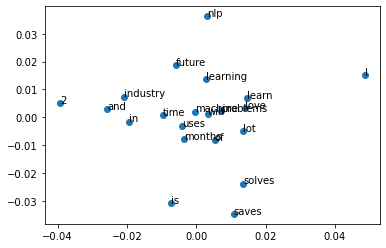

In [54]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(fast.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

The figure above shows the embedding representation for fastText.
If you observe closely, the words “love” and “solve” are close together in
fastText but in your skip-gram and CBOW, “love” and “learn” are near to
each other. This is an effect of character-level embeddings.

We hope that by now you are familiar and comfortable with processing
the natural language. Now that data is cleaned and features are created,
let’s jump into building some applications around it that solves the
business problem